In [166]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm, preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [141]:
# Import diamonds dataset. Drop column zero as it contains a flase index

diamonds = pd.read_csv('diamond.csv')
display(diamonds.head())
df = diamonds.drop('Unnamed: 0', axis=1)
diamonds.drop('Unnamed: 0', axis=1, inplace=True)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


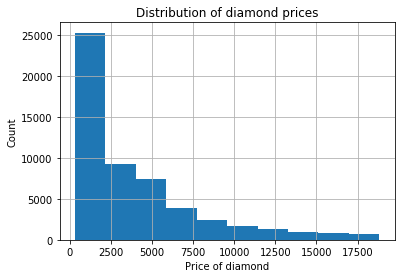

In [142]:
# Plot histogram to see distributuon of diamond prices
plt.subplot()
display(df.price.hist())
plt.xlabel('Price of diamond')
plt.ylabel('Count')
plt.title('Distribution of diamond prices')

# Drop results where diamond prices are greater than 10,000 to obtain better estimates
df.drop(df[df.price > 10000].index, inplace = True)
diamonds.drop(diamonds[diamonds.price > 10000].index, inplace = True)

In [143]:
# Count how many null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [144]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [145]:
# See data types
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [146]:
# Rate the clarity, cut and color of diamond into numeric values.

cut_dict = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
clarity_dict = {'I3': 1, 'I2': 2, 'I1': 3, 'SI2': 4, 'SI1': 5, 'VS2': 6, 'VS1': 7, 'VVS2': 8, 'VVS1': 9, 'IF': 10}
color_dict = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

In [147]:
# Apply to the dataframe columns
df['cut'] = df['cut'].map(cut_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)

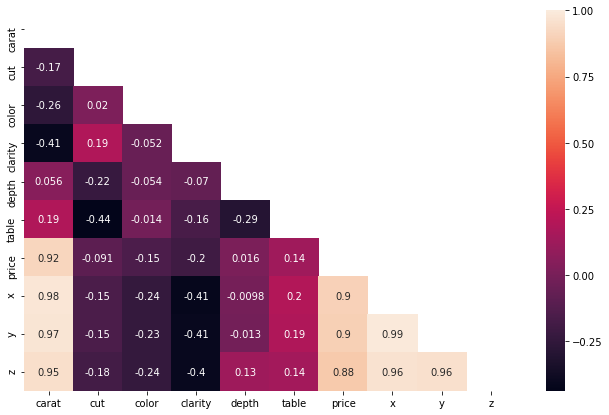

In [148]:
# Show correlation matrix of dataframe

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(11,7))
sns.heatmap(df.corr(), mask = mask, annot=True)

In [149]:
# Establish X, y values. Using preprocessing.scale increases the accuracy of the results by normalizing the X values.
# Apply train-test-split
X = preprocessing.scale(df.drop('price', axis = 1).values)
y = df.price.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [150]:
# Use 'rbf' as after testing with different models it provided the best output

clf = svm.SVR(kernel = 'rbf')
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [151]:
# Score
clf.score(X_test, y_test)

0.7508394782833864

In [152]:
# Print the predicted price of diamond versus the actual price

for X, y in list(zip(X_test, y_test))[:20]:
    print(f'Model: {clf.predict([X])[0]}, Actual: {y}')

Model: 2568.094644407152, Actual: 2352
Model: 2914.8897773479785, Actual: 2583
Model: 4566.4808551302485, Actual: 5665
Model: 4460.302051895416, Actual: 6241
Model: 855.4556847187262, Actual: 896
Model: 1279.3160131757204, Actual: 612
Model: 2156.3834554332702, Actual: 2157
Model: 2516.570873307915, Actual: 2206
Model: 5338.303532930834, Actual: 6450
Model: 3544.3492660535144, Actual: 3862
Model: 4399.032161706907, Actual: 8049
Model: 4270.6830109651855, Actual: 4292
Model: 3420.144956829864, Actual: 3093
Model: 5227.277847227595, Actual: 6530
Model: 3913.5172204562214, Actual: 3288
Model: 1017.7061265984685, Actual: 628
Model: 4579.043507935701, Actual: 7549
Model: 3331.638433526031, Actual: 2816
Model: 5509.82372833781, Actual: 6129
Model: 1877.741220572546, Actual: 2045


In [153]:
# Calculate the percentage
diff = []
for X, y in list(zip(X_test, y_test)):
    diff.append((y - clf.predict([X])[0])/y * 100)

In [154]:
# Calculate the average error on the results.
diff = [x*-1 for x in diff if x < 0]
print('Error: ', np.mean(diff), '%')

Error:  29.915120806377267 %


In [155]:
# Conditions for what makes a good diamond:

# price/ carat relationship > 6000
# color H(3) or higher
# clarity VS2(6) or higher

In [156]:
diamonds['Good/Bad'] = np.where(((df.price/ df.carat) > 6000) & (df.color >= 3) & (df.clarity >= 6), 1, 0)

In [157]:
display(diamonds.head())
print(diamonds['Good/Bad'].value_counts(normalize = True))

,carat,cut,color,clarity,depth,table,price,x,y,z,Good/Bad
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


0    0.9337
1    0.0663
Name: Good/Bad, dtype: float64


In [158]:
# Seperating into y and x
diamonds_y = diamonds['Good/Bad']
diamonds_x = pd.get_dummies(data=diamonds[['cut', 'color', 'clarity']])

In [159]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(diamonds_x, diamonds_y, test_size=0.2)

In [160]:
# Generating our model
ks_model = LogisticRegression().fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [161]:
# Confusion matrix
y_pred_test = ks_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[9117,    0],
       [ 627,    0]])

auc:  0.838871790416656


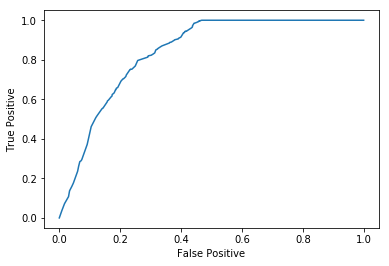

In [168]:
# Plotting the ROC curve and displaying the area under the curve.
y_pred_proba = ks_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

print('auc: ', auc)
plt.subplot()
plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.plot(fpr,tpr)

In [163]:
# calculate the accuracy of the model
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores = cross_val_score(clf, diamonds_x, diamonds_y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.00)


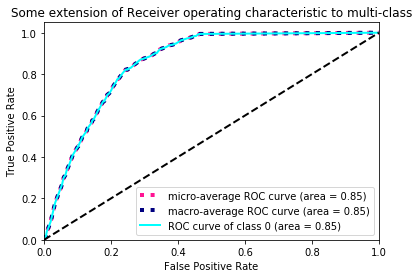

In [167]:
X = diamonds_x
y = diamonds_y

y = label_binarize(y, classes=[0,1]) # Make y a binary measure
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) # Apply train-test-split to 
                                                                                        # to split data
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=20)) # We train the model to predict whether a diamond
                                                                # is good or bad. 
clf.fit(X_train, y_train)
y_score = clf.predict_proba(np.c_[X_test])[:,1] 

fpr = dict() # Compute ROC Curve and area
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel()) # Compute micro-average ROC curve and area
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)   # Interpolate the ROC curve with all the false positive values
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr  # Compute macro-average ROC curve and area
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()  # Plot ROC curve
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [170]:
# 
# Precision --> ratio of true positives to those predicted positive
# Recall --> ratio of true positives to all positives
# F-score --> harmonic mean of the precision and recall


from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

balanced_score = balanced_accuracy_score(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print('Balanced Accuracy Score: ', balanced_score)
print('Precision: ', precision)
print('Recall: ', recall)
print('F-score: ', f1_score)

Balanced Accuracy Score:  0.5036321645201658
Precision:  0.8333333333333334
Recall:  0.007374631268436578
F-score:  0.014619883040935672


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score